## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress 
import numpy as np 
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

#the mouse_id is the column to merge onto 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset, merge two DataFrames
merged_df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how='outer')                  

merged_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# Display the data table for preview
merged_df.head()

# merged_df.mean()
# merged_df.min()
# merged_df.count()
# merged_df.dtypes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# order data by setting the drug regimen to the index then groupby the mouse ID
# set your data in a way you understand
merged_final = merged_df.set_index('Drug Regimen').groupby('Mouse ID')
merged_final.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,0,45.000000,0
Naftisol,z969,Male,9,30,5,49.332999,0
Naftisol,z969,Male,9,30,10,52.656081,1


In [5]:
# Checking the number of mice.

number_of_mice = len(merged_final['Mouse ID'])

number_of_mice


249

In [6]:
# # Optional: Get all the data for the duplicate Mouse ID 

mice_dup = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint'])].value_counts()
print(mice_dup)

#mouse g989, show all data in the table for the mouse using display function  

duplicate_mouse = merged_df.loc[merged_df['Mouse ID'] == 'g989']
display(duplicate_mouse)

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# this is not working 

means_one = merged_final.mean()['Tumor Volume (mm3)']
median_one = merged_final.median()['Tumor Volume (mm3)']
var_one = merged_final.var()['Tumor Volume (mm3)']
std_one= merged_final.std()['Tumor Volume (mm3)']
sem_one = merged_final.sem()['Tumor Volume (mm3)']


calculations_on_tumor = pd.DataFrame({
    'Mean': means_one,
    'Median': median_one,
    'Variance': var_one, 
    'Standard Deviation': std_one,
    'Std. Error of the Mean': sem_one 
})
calculations_on_tumor


,Mean,Median,Variance,Standard Deviation,Std. Error of the Mean
Mouse ID,,,,,
a203,56.312708,55.983272,50.407041,7.099792,2.245151
a251,55.237095,55.938620,51.740730,7.193103,2.274659
a262,58.611631,58.572588,84.759928,9.206515,2.911356
a275,52.770965,52.044750,36.322924,6.026850,1.905857
a366,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...
z435,46.942214,47.115980,3.464898,1.861424,1.074693
z578,38.411510,38.160380,17.969628,4.239060,1.340508
z581,53.979584,53.062175,29.827123,5.461421,1.727053


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
#merged_dup.dtypes
mean_tumor_vol_grouped= merged_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median','var', 'std', 'sem']})

mean_tumor_vol_grouped




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
merged_df.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Bar and Pie Charts

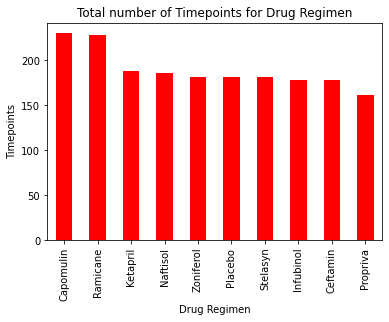

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_dreg = merged_df['Drug Regimen'].value_counts()

figure_1 = count_dreg.plot(kind='bar', facecolor = 'red')

plt.title('Total number of Timepoints for Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.show()


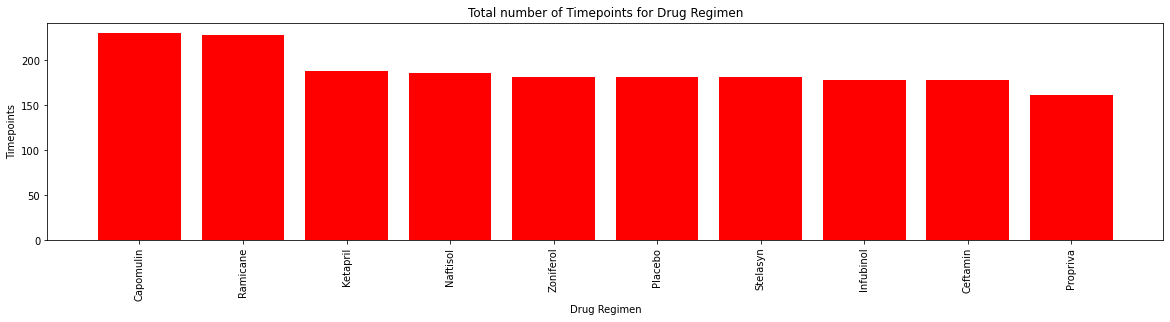

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# set the xaxis and tick locations
x_axis = np.arange(len(count_dreg))
tick_locations = [value for value in x_axis]
#plot 
plt.figure(figsize=(20,4))
plt.bar(x_axis, count_dreg, color='red', alpha=1, align='center')
plt.xticks(tick_locations, count_dreg.index.values, rotation='vertical')
# titles, labels, show the bar chart 
plt.title('Total number of Timepoints for Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.show()

'''
Conclusion: Capomulin and Ramicane ran the longest trials at seems as they both had the
most test points collected. Proprtiva had the shortest trial with the least number of 
datapoints collected.
'''
           

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64


([<matplotlib.patches.Wedge at 0x7fa979903be0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

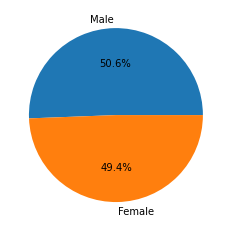

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex= merged_df.groupby(['Sex']).count()['Mouse ID']
print(sex)
count = merged_df['Sex'].value_counts()
plt.pie(count.values, labels=count.index.values,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fa98ac23340>,
 [Text(0.021946708175884906, 1.1497905644073805, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.012404661142891469, 0.6498816233606933, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

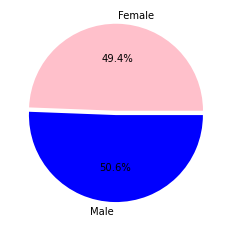

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['pink', 'blue']
explode=(0.05,0)
plt.pie(sex, explode=explode, colors = colors, labels=sex.index.values, autopct='%1.1f%%')

'''
Conclusion: Nearly an equal split between the sexes. There are more males than females. 
'''


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Not sure I understand why we needed to to find this. 
mouse_max = merged_df.groupby('Mouse ID').max()
mouse = mouse_max.reset_index()
mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_merge_df = mouse[['Mouse ID', 'Timepoint']].merge(merged_df, on=['Mouse ID', 'Timepoint'])
mouse_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# create an empty list to store regimen data 
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_data = []

#create a for loop 
for r in regimens:
    
    #locate the regimens 
    regimen_df = mouse_merge_df.loc[mouse_merge_df['Drug Regimen'] == r]
    #subset dataframe narrows down to last time point for each regimen
    tumor_vol_df = regimen_df.loc[regimen_df['Timepoint'] == regimen_df['Timepoint']]
    #grab the volumes 
    volumes = tumor_vol_df['Tumor Volume (mm3)']
    #put volume data into the empty list created earlier 
    regimen_data.append(volumes)
    
    #the quartiles,iqr, and quantitatively determine if there any potential outliers
    
    #quartiles = tumor_vol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'The lower quartile for {r}: {lowerq}')
    print(f'The upper quartile for {r}: {upperq}')
    print(f'The interquartile for {r}: {iqr}')
    print(f'The median for {r}: {quartiles[0.5]}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {r}.")
    print(f"Values above {upper_bound} could be outliers for {r}.")

    #determine the number of outliers identified using count()
    outlier_tumor_vol = volumes.loc[(tumor_vol_df['Tumor Volume (mm3)'] < lower_bound) | (tumor_vol_df['Tumor Volume (mm3)'] > upper_bound)].count()
    print(f'There are {outlier_tumor_vol} outliers.')

'''
Conclusion: Statistically, it appears there are no outliers detected. 
'''
    
    
    

    

The lower quartile for Capomulin: 32.37735684
The upper quartile for Capomulin: 40.1592203
The interquartile for Capomulin: 7.781863460000004
The median for Capomulin: 38.1251644
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
There are 0 outliers.
The lower quartile for Ramicane: 31.56046955
The upper quartile for Ramicane: 40.65900627
The interquartile for Ramicane: 9.098536719999998
The median for Ramicane: 36.56165229
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
There are 0 outliers.
The lower quartile for Infubinol: 54.04860769
The upper quartile for Infubinol: 65.52574285
The interquartile for Infubinol: 11.477135160000003
The median for Infubinol: 60.16518046
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
There are 1 outliers.
The lower quartile for Ce

'\nConclusion: There are no outliers. \n'

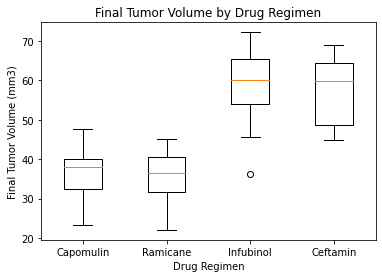

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(regimen_data)
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], regimens)
plt.show()

'''
Conclusion: An outlier final tumor volume can be seen on Drug Regimen Infubinol. 
'''

## Line and Scatter Plots

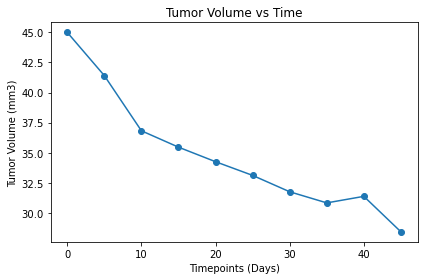

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#pick random mouse, see mouse_metadata, picked mouse 3 m601 
mouse_metadata.head()

#use original merged_df 
#locate mouse
# cap_mouse = merged_df.loc[merged_df['Mouse ID']=='s185']
# cap_mouse = merged_df.loc[merged_df['Mouse ID']=='x401']
cap_mouse = merged_df.loc[merged_df['Mouse ID']=='m601']
cap_mouse.head()

#Plot 
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker ='o')
#scatter plot version 
#cap_mouse.plot(kind='scatter', x='Timepoint', y= 'Tumor Volume (mm3)', grid=True, figsize=(8,8))
plt.xlabel('Timepoints (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time')
plt.tight_layout()
plt.show()

'''
Conclusion: The line chart shows a negative correlation between tumor volume and the number of days. 
As time went on, the volume of the tumor decreases. 
'''


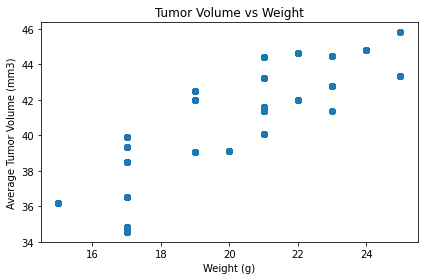

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#use original merged_df 

cap_data = merged_df.loc[merged_df['Drug Regimen']=='Capomulin']

cap_mouse.head()

#cap_data_avg = merged_df.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean()
cap_data_avg = merged_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_data_avg.sort_values().reset_index()

merge_cap = pd.merge(cap_data, cap_data_avg, on='Mouse ID')
merged_cap_final = merge_cap.rename(columns={'Tumor Volume (mm3)_y':'Avg. Tumor Volume'})
merged_cap_final.head()
plt.scatter(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
plt.title('Avg. Tumor Volume vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

'''
Conclusion: Data seems to indicate that there may be a positive correlation between the Avg. Tumor Volume and Weight.
'''

## Correlation and Regression

 The correlation coefficient b/w the mouse weight and average tumor volume (0.8343958614425954, 6.495737656137799e-61)


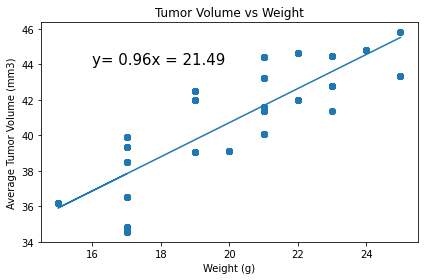

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


cap_data = merged_df.loc[merged_df['Drug Regimen']=='Capomulin']

#cap_data_avg = merged_df.groupby('Mouse ID')['Weight (g)','Tumor Volume (mm3)'].mean()
cap_data_avg = merged_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_data_avg.sort_values().reset_index()

merge_cap = pd.merge(cap_data, cap_data_avg, on='Mouse ID')
merged_cap_final = merge_cap.rename(columns={'Tumor Volume (mm3)_y':'Avg. Tumor Volume'})
merged_cap_final.head()
#calculations
correlation = st.pearsonr(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
print(f' The correlation coefficient b/w the mouse weight and average tumor volume {correlation}')
x = merged_cap_final['Weight (g)']
y = merged_cap_final['Avg. Tumor Volume'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
regress_values = x* slope + intercept 
line_eq = 'y= ' + str(round(slope,2)) + 'x = ' + str(round(intercept,2))



plt.scatter(merged_cap_final['Weight (g)'], merged_cap_final['Avg. Tumor Volume'])
plt.plot(x, regress_values)
plt.annotate(line_eq,(16,44), fontsize=15)
plt.title('Avg. Tumor Volume vs Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


'''
Conclusion: A positive correlaion between Tumor Volume and Weight can be seen on the plot. 
'''